In [1]:
import pandas as pd,seaborn as sns,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('D:\Datasets\wine_quality.csv')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


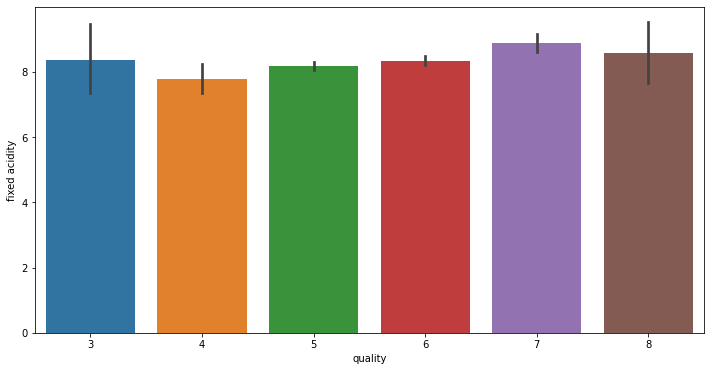

In [4]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='fixed acidity',data = data)

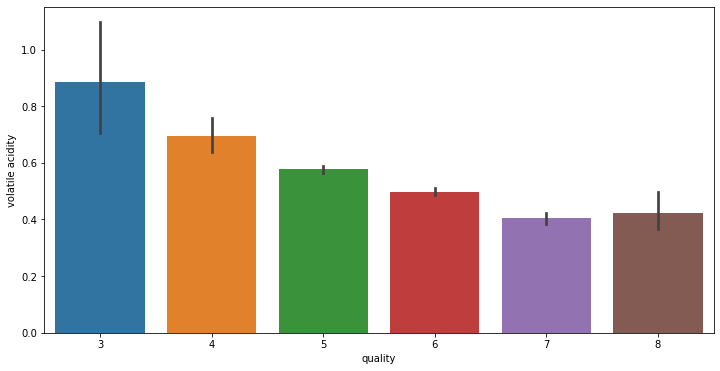

In [5]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='volatile acidity',data = data)

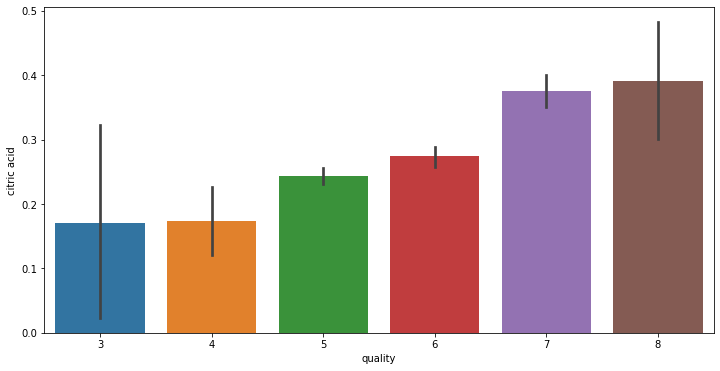

In [6]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='citric acid',data = data)

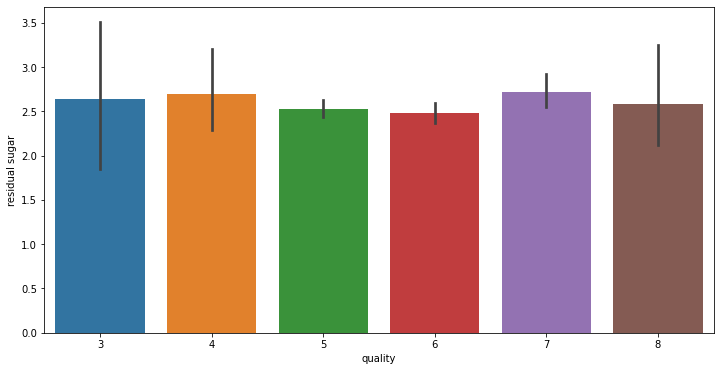

In [7]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='residual sugar',data = data)

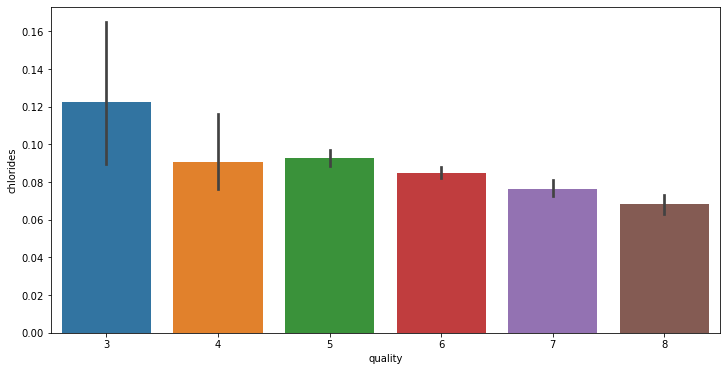

In [8]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='chlorides',data = data)

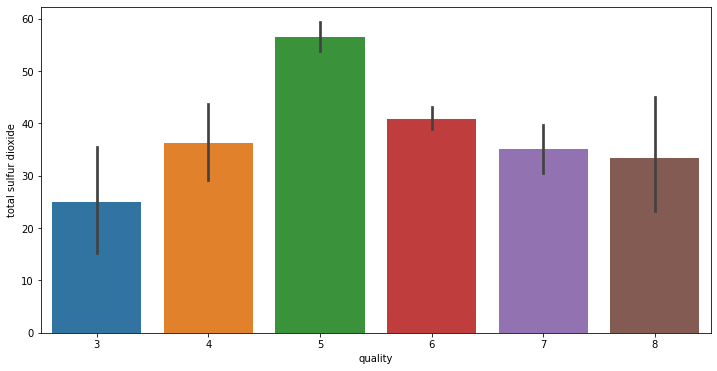

In [9]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='total sulfur dioxide',data = data)

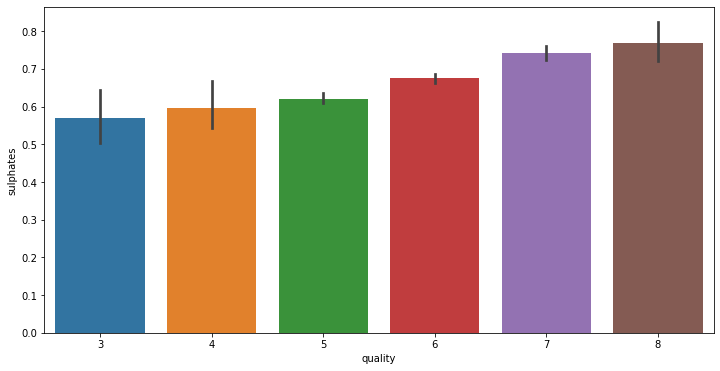

In [10]:
fig = plt.figure(figsize=(12,6))
sns.barplot(x = 'quality', y='sulphates',data = data)

In [11]:
bins = (2,6.5,8)
group_names = ['bad','good']
data['quality'] = pd.cut(x=data['quality'], bins = bins,labels = group_names)

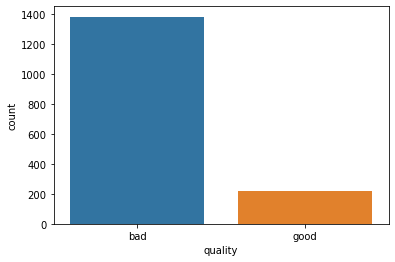

In [12]:
sns.countplot(x='quality',data=data)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = data.drop('quality',axis=1)
y= data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
ss.fit(X_train, y_train)

StandardScaler()

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc = RandomForestClassifier()

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
predicted = rfc.predict(X_test)

In [22]:
from  sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predicted))
print("\n")
print(classification_report(y_test,predicted))

[[343  12]
 [ 18  27]]


              precision    recall  f1-score   support

         bad       0.95      0.97      0.96       355
        good       0.69      0.60      0.64        45

    accuracy                           0.93       400
   macro avg       0.82      0.78      0.80       400
weighted avg       0.92      0.93      0.92       400



In [24]:
from sklearn.svm import SVC

In [25]:
svc = SVC()

In [26]:
svc.fit(X_train,y_train)

SVC()

In [27]:
predict_svc  = svc.predict(X_test)

In [28]:
print(confusion_matrix(y_test,predict_svc))
print("\n")
print(classification_report(y_test,predict_svc))

[[355   0]
 [ 45   0]]


              precision    recall  f1-score   support

         bad       0.89      1.00      0.94       355
        good       0.00      0.00      0.00        45

    accuracy                           0.89       400
   macro avg       0.44      0.50      0.47       400
weighted avg       0.79      0.89      0.83       400



C:\Users\Acer\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'C':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
gs = GridSearchCV(svc,params)

In [31]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]})

In [32]:
predict_gs = gs.predict(X_test)

In [35]:
print(confusion_matrix(y_test,predict_gs))
print("\n")
print(classification_report(y_test,predict_gs))

[[355   0]
 [ 32  13]]


              precision    recall  f1-score   support

         bad       0.92      1.00      0.96       355
        good       1.00      0.29      0.45        45

    accuracy                           0.92       400
   macro avg       0.96      0.64      0.70       400
weighted avg       0.93      0.92      0.90       400



In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
rfc2 = cross_val_score(estimator=rfc,X=X_train,y = y_train,cv=10)

In [39]:
rfc2.mean()

0.9007633053221289